<a href="https://colab.research.google.com/github/aldoSN003/BioBackHack/blob/main/DATA_CLEANING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


En este jupyter notebook, realizamos una **recoleccion de datos** y un **pre-procesamiento** de los mismos


## **ChEMBL Database**

ChEMBL (ChEMBLdb) es una base de datos de acceso abierto que contiene información sobre moléculas bioactivas con propiedades farmacológicas.

Características principales:

--Contenido: Reúne datos químicos, bioactividad y genómicos de compuestos. Incluye medidas de bioactividad como Ki, Kd, IC50 y EC50, que indican la potencia de un compuesto para interactuar con un objetivo biológico (proteínas, enzimas, etc.).

--Origen de los datos: La información proviene principalmente de publicaciones científicas en revistas de química medicinal y otras fuentes.

--Curación manual: Los datos son extraídos y curados manualmente por expertos para asegurar su calidad y fiabilidad.

--Aplicación: ChEMBL es ampliamente utilizado en la investigación y desarrollo de fármacos. Permite a los científicos analizar y filtrar datos para identificar compuestos prometedores, diseñar nuevas moléculas y comprender las relaciones entre la estructura química y la actividad biológica.

## **LIBRERIAS NECESARIAS**

INSTALA el paquete del servicio web ChEMBL para que podamos RECUPERAR datos de bioactividad de la base de datos ChEMBL.

In [ ]:
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00


## **Importando librerias**

In [ ]:

import pandas as pd
from chembl_webresource_client.new_client import new_client

## **BUSQUEDA DE PROTEINAS DIANA (TARGET)**
En el descubrimiento de fármacos, la búsqueda de proteínas diana es crucial por varias razones:

Mecanismo de Acción: Los medicamentos funcionan al interactuar con proteínas específicas en el cuerpo, conocidas como proteínas diana. Estas proteínas desempeñan papeles esenciales en los procesos biológicos o en las vías de las enfermedades. Identificar la proteína diana correcta permite a los investigadores comprender cómo un fármaco ejercerá su efecto terapéutico.

Eficacia y Especificidad del Medicamento: Una proteína diana bien elegida garantiza que el medicamento actúe precisamente sobre el proceso biológico deseado, aumentando su eficacia y reduciendo el riesgo de efectos secundarios causados por interacciones con proteínas no deseadas (efectos fuera del objetivo).

Diseño y Optimización de Medicamentos: Comprender la estructura y función de la proteína diana proporciona un modelo para diseñar medicamentos que se unan a ella de manera efectiva. Este conocimiento guía la optimización de los candidatos a fármacos para mejorar su potencia, selectividad y propiedades farmacocinéticas.

Medicina Personalizada: En algunos casos, las variaciones genéticas en las proteínas diana pueden influir en cómo los individuos responden a los medicamentos. Identificar estas variaciones puede ayudar a adaptar los tratamientos a poblaciones de pacientes específicas, lo que lleva a enfoques de medicina personalizada.

Reutilización de Medicamentos: A veces, los medicamentos existentes que se dirigen a una proteína específica para una enfermedad pueden reutilizarse para otra enfermedad si la misma proteína está involucrada en ambas afecciones. Este enfoque puede acelerar el desarrollo de fármacos y reducir costos.

### **BUSQUEDA DE TARGET PARA coronavirus**

In [ ]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


### **Selecciona y recupera datos de bioactividad para *SARS coronavirus 3C-like proteinase* (sexta entrada)**


Asignaremos la sexta entrada (proteina diana) a la variable ***selected_target***

In [ ]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

**nanomolar**
Nanomolar (nM) es una unidad de concentración que indica la cantidad de sustancia (en moles) por litro de solución. Se utiliza para expresar concentraciones muy pequeñas.

**IC50**
El valor IC50 (Concentración Inhibitoria Media) es una medida utilizada en farmacología y bioquímica para indicar la potencia de una sustancia para inhibir un proceso biológico o bioquímico específico.

En términos más simples, el IC50 representa la concentración de una sustancia (como un fármaco) necesaria para reducir a la mitad la actividad de un objetivo biológico (como una enzima, una célula o un microorganismo).

Interpretación:

Un valor IC50 más bajo indica que se necesita una concentración menor de la sustancia para lograr la inhibición del 50%, lo que significa que la sustancia es más potente.
Un valor IC50 más alto indica que se necesita una concentración mayor de la sustancia para lograr la inhibición del 50%, lo que significa que la sustancia es menos potente.
Aplicaciones:

El IC50 se utiliza ampliamente en la investigación y desarrollo de fármacos para:

Comparar la potencia de diferentes fármacos: Permite evaluar qué fármaco es más efectivo para inhibir un objetivo biológico específico.
Optimizar el diseño de fármacos: Ayuda a los investigadores a modificar la estructura de una molécula para mejorar su potencia y reducir posibles efectos secundarios.
Estudiar las interacciones fármaco-receptor: Proporciona información sobre cómo un fármaco interactúa con su objetivo biológico.
Ejemplo:

Si un fármaco A tiene un IC50 de 10 nM (nanomolar) y un fármaco B tiene un IC50 de 100 nM para el mismo objetivo biológico, significa que el fármaco A es 10 veces más potente que el fármaco B para inhibir ese objetivo.




In [ ]:

"""Este fragmento de código recupera datos
de bioactividad (específicamente valores de IC50)
de la base de datos ChEMBL para la proteína diana
SARS coronavirus 3C-like proteinase. Los datos
filtrados resultantes, almacenados en la variable res
"""
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


Finalmente, guardaremos la informacion de la bioactividad en un archivo csv  **bioactivity_data.csv**.

In [ ]:
df.to_csv('bioactivity_data_raw.csv', index=False)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


## **Limpiando valores nulos**
Si algun compuesto tiene valor nulo para la columna standard_value, entonces se elimina

In [ ]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


NO HUBO VALORES NULOS



## **Pre-procesamiento de los datos de la bioactividad*

### **Clasificación de los compuestos como activo-inactivo o intermedio**
Los datos de bioactividad están en unidades de IC50. Los compuestos con valores menores a 1000 nM serán considerados activos, mientras que aquellos con valores mayores a 10,000 nM serán considerados inactivos. Los valores entre 1,000 y 10,000 nM se denominarán intermedios.

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### **Combina  3 columnas (molecule_chembl_id,canonical_smiles,standard_value) y bioactivity_class en un DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


In [ ]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


Guardar dataframe en CSV file

In [ ]:
#ESTE DATAFRAME ESTÁ LISTO PARA UTILIZARSE EN UN MODELO DE MACHINE LEARNING
#df4.to_csv('bioactivity_data_preprocessed.csv', index=False)

df4.to_csv('bioactivity_data_preprocessed.csv', index=False)



---

# ** analisis exploratorio**








Calcularemos descriptores moleculares y haremos analisis exploratorio

Los descriptores de Lipinski, también conocidos como la "Regla de Cinco" (Ro5), son un conjunto de pautas utilizadas en el descubrimiento de fármacos para estimar la "farmaco-similitud" (druglikeness en inglés) de un compuesto químico. En otras palabras, ayudan a predecir si una molécula tiene probabilidades de ser absorbida y distribuida eficazmente en el cuerpo humano cuando se toma por vía oral.

Los cuatro descriptores clave de Lipinski son:

--Peso molecular: Debe ser inferior a 500 daltons.

--Lipophilicidad (logP): El coeficiente de partición octanol-agua, que mide qué tan bien se disuelve un compuesto en grasas versus agua. Debe ser inferior a 5.
--Número de donantes de enlaces de hidrógeno: El número de átomos de nitrógeno u oxígeno con átomos de hidrógeno unidos. Debe ser inferior a 5.

--Número de aceptores de enlaces de hidrógeno: El número de átomos de nitrógeno u oxígeno. Debe ser inferior a 10.

Los compuestos que violan más de una de estas reglas tienen menos probabilidades de estar biodisponibles por vía oral debido a posibles problemas con la absorción, distribución, metabolismo o excreción.
Los descriptores de Lipinski son una herramienta valiosa en las primeras etapas del descubrimiento de fármacos, ya que ayudan a priorizar los compuestos que tienen más probabilidades de tener éxito como medicamentos orales, lo que ahorra tiempo y recursos en el proceso de desarrollo.

---

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
df = pd.read_csv('bioactivity_data_preprocessed.csv')


--2024-05-18 15:39:18--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   169MB/s    in 0.5s    

2024-05-18 15:39:19 (169 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

In [ ]:
!pip install rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [ ]:
def calculate_lipinski_descriptors(smiles_list):
    def calc_descriptors(smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            return [Descriptors.MolWt(mol), Descriptors.MolLogP(mol), Lipinski.NumHDonors(mol), Lipinski.NumHAcceptors(mol)]
        else:
            return [None] * 4  # Return None for all descriptors if the SMILES is invalid

    descriptors = pd.DataFrame(smiles_list.apply(calc_descriptors).tolist(), columns=["MW", "LogP", "NumHDonors", "NumHAcceptors"])
    return descriptors


In [ ]:
df_molecular_descriptor = calculate_lipinski_descriptors(df.canonical_smiles)
df_molecular_descriptor

df4 = pd.concat([df3, bioactivity_class], axis=1)


,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0,5
1,415.589,3.81320,0,2
2,421.190,2.66050,0,4
3,293.347,3.63080,0,3
4,338.344,3.53900,0,5
...,...,...,...,...
128,338.359,3.40102,0,5
129,296.366,3.44330,0,3
130,276.291,4.09564,0,3
131,278.307,3.29102,0,3


In [ ]:
df_combined = df4.join(df_molecular_descriptor)


df_combined.to_csv('bioactivity_data_combined.csv', index=False)

In [ ]:
# Sort by 'NumHDonors' in descending order and display the top 10 rows
top_10_hdonors = df_combined.nlargest(10, 'NumHDonors')[['molecule_chembl_id', 'NumHDonors']]

# Format and print the results
print("Top 10 Molecules with Highest NumHDonors:")
print(top_10_hdonors.to_markdown(index=False, numalign='left', stralign='left'))


Top 10 Molecules with Highest NumHDonors:
| molecule_chembl_id   | NumHDonors   |
|:---------------------|:-------------|
| CHEMBL194398         | 3            |
| CHEMBL196635         | 3            |
| CHEMBL210497         | 3            |
| CHEMBL210497         | 3            |
| CHEMBL210146         | 2            |
| CHEMBL210146         | 2            |
| CHEMBL207458         | 2            |
| CHEMBL207458         | 2            |
| CHEMBL207484         | 2            |
| CHEMBL207484         | 2            |


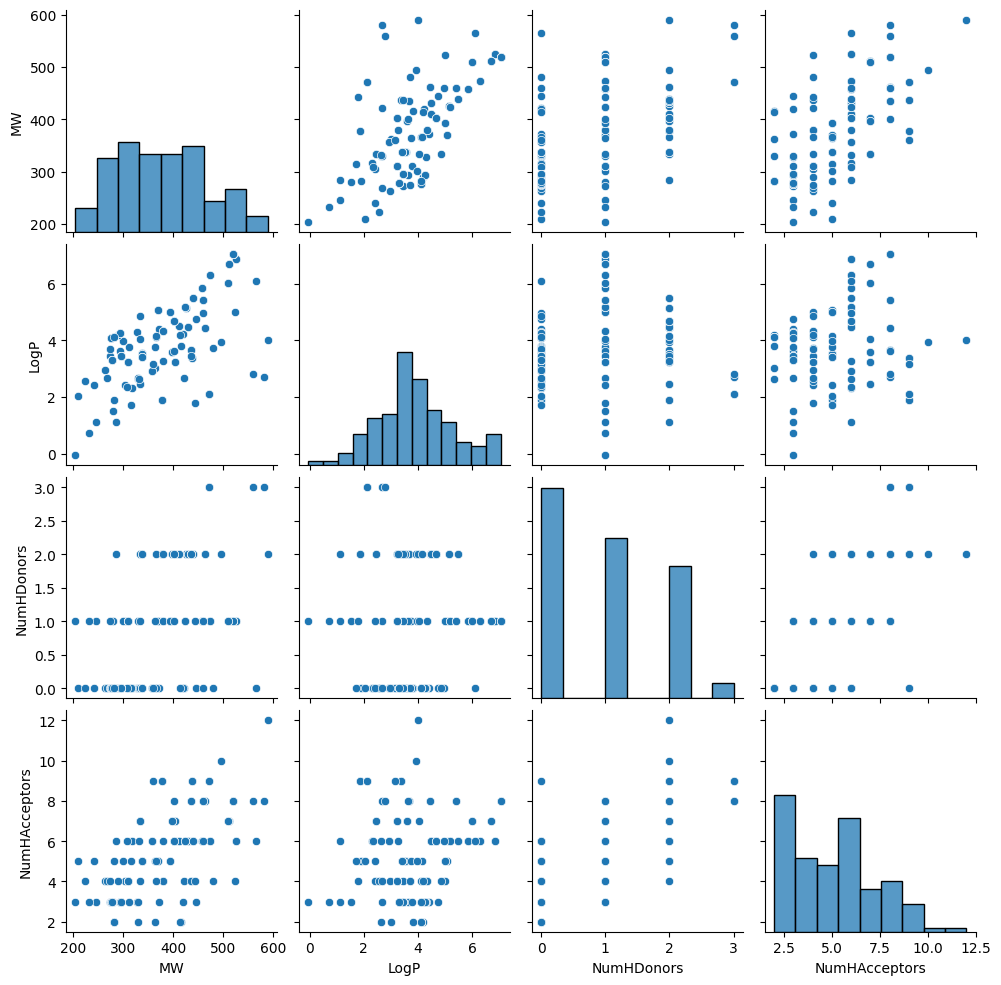

In [ ]:



import seaborn as sns  # Import Seaborn
import matplotlib.pyplot as plt

# Plot scatter plots between each pair of Lipinski descriptors
sns.pairplot(df_combined[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']])
plt.show()


In [ ]:
#VALORES DE Lipinski's rule of five
lipinski_thresholds = {
    'MW': 500,
    'LogP': 5,
    'NumHDonors': 5,
    'NumHAcceptors': 10
}
# Create a boolean mask for each Lipinski rule
lipinski_pass = (df_combined['MW'] <= lipinski_thresholds['MW']) & \
                (df_combined['LogP'] <= lipinski_thresholds['LogP']) & \
                (df_combined['NumHDonors'] <= lipinski_thresholds['NumHDonors']) & \
                (df_combined['NumHAcceptors'] <= lipinski_thresholds['NumHAcceptors'])

# Filter the DataFrame based on the mask
df_lipinski = df_combined[lipinski_pass].copy()  # Create a copy to avoid SettingWithCopyWarning


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0,3
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0,5
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0,5
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0,3
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0,3
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0,3


In [ ]:
# Add a column indicating the number of Lipinski rule violations for each molecule
df_combined['Lipinski_violations'] = (df_combined[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']] > pd.Series(lipinski_thresholds)).sum(axis=1)

df_combined.to_csv('bioactivity_data_combined_numberViolations.csv', index=False)

In [ ]:

# conteo de violaciones por cada molecula que se sale de los rangos establecidos previamente
#en lipinski_thresholds
print(df_combined['Lipinski_violations'].value_counts())


Lipinski_violations
0    102
1     19
2     12
Name: count, dtype: int64


In [ ]:
#filtro de moleculas
#unicamente mantenemos las moleculas que violan 1 o dos rangos de los descriptores moleculares
df_filtered = df_combined[df_combined['Lipinski_violations'] <= 1].copy()
df_filtered.to_csv('bioactivity_data_filtered.csv', index=False)
df_filtered

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,Lipinski_violations
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5,0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2,0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4,0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0,3,0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0,5,0
...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0,5,0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0,3,0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0,3,0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0,3,0


In [ ]:

# Define the desired order of bioactivity classes
bioactivity_order = ['active', 'intermediate', 'inactive']

# Convert the 'bioactivity_class' column to a categorical datatype with the specified order
df_combined['bioactivity_class'] = pd.Categorical(df_combined['bioactivity_class'], categories=bioactivity_order, ordered=True)

# Sort the DataFrame by the 'bioactivity_class' column in ascending order
df_combined_sorted = df_combined.sort_values(by='bioactivity_class')

# Show the sorted dataframe
print(df_combined_sorted.head().to_markdown(index=False, numalign='left', stralign='left'))
df_combined_sorted.to_csv('bioactivity_data_sorted.csv', index=False)


| molecule_chembl_id   | canonical_smiles                             | standard_value   | bioactivity_class   | MW      | LogP    | NumHDonors   | NumHAcceptors   | Lipinski_violations   |
|:---------------------|:---------------------------------------------|:-----------------|:--------------------|:--------|:--------|:-------------|:----------------|:----------------------|
| CHEMBL426898         | O=C(Oc1cncc(Cl)c1)c1cc2ccccc2o1              | 170              | active              | 273.675 | 3.7004  | 0            | 4               | 0                     |
| CHEMBL222234         | O=C(Oc1cncc(Br)c1)c1ccco1                    | 50               | active              | 268.066 | 2.6563  | 0            | 4               | 0                     |
| CHEMBL358279         | NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccc2ccccc2c1 | 370              | active              | 330.343 | 2.6682  | 1            | 3               | 0                     |
| CHEMBL225515         | O=C(Oc1cncc(Cl)c1)c1cc2cc

In [ ]:
df_combined_sorted = df_combined.sort_values(by='bioactivity_class')
df_combined_sorted

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,Lipinski_violations
106,CHEMBL426898,O=C(Oc1cncc(Cl)c1)c1cc2ccccc2o1,170.0,active,273.675,3.70040,0,4,0
105,CHEMBL222234,O=C(Oc1cncc(Br)c1)c1ccco1,50.0,active,268.066,2.65630,0,4,0
15,CHEMBL358279,NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccc2ccccc2c1,370.0,active,330.343,2.66820,1,3,0
104,CHEMBL225515,O=C(Oc1cncc(Cl)c1)c1cc2ccccc2[nH]1,65.0,active,272.691,3.43550,1,3,0
123,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,700.0,active,276.291,4.09564,0,3,0
...,...,...,...,...,...,...,...,...,...
43,CHEMBL378674,CSc1sc(-c2nc(C)cs2)c(C)c1-c1ccnc(SCC(=O)Nc2ccc...,12000.0,inactive,519.142,7.05154,1,8,2
42,CHEMBL378674,CSc1sc(-c2nc(C)cs2)c(C)c1-c1ccnc(SCC(=O)Nc2ccc...,12022.64,inactive,519.142,7.05154,1,8,2
41,CHEMBL210097,O=C(CSc1nccc(-c2cc(-c3ccc(Cl)cc3Cl)no2)n1)Nc1c...,15000.0,inactive,525.339,6.85500,1,6,2
54,CHEMBL210145,CCOc1ccc(N2C(=O)CC(Sc3nc(C)cc(C)n3)C2=O)cc1,301995.17,inactive,357.435,2.91634,0,6,0


In [ ]:
# Calculate summary statistics for each Lipinski descriptor by bioactivity class
summary_stats = df_combined.groupby('bioactivity_class')[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']].describe()
print(summary_stats)


                      MW                                                     \
                   count        mean        std      min       25%      50%   
bioactivity_class                                                             
active              15.0  325.667400  92.983337  223.615  270.3785  289.743   
intermediate        15.0  348.104200  71.252006  276.291  282.9995  338.344   
inactive           103.0  387.899553  85.626228  204.185  312.5275  393.512   

                                       LogP            ... NumHDonors       \
                        75%      max  count      mean  ...        75%  max   
bioactivity_class                                      ...                   
active             353.2005  565.041   15.0  3.777084  ...        0.0  1.0   
intermediate       407.2700  473.410   15.0  3.774997  ...        1.0  2.0   
inactive           440.7155  588.635  103.0  3.946718  ...        2.0  3.0   

                  NumHAcceptors                         

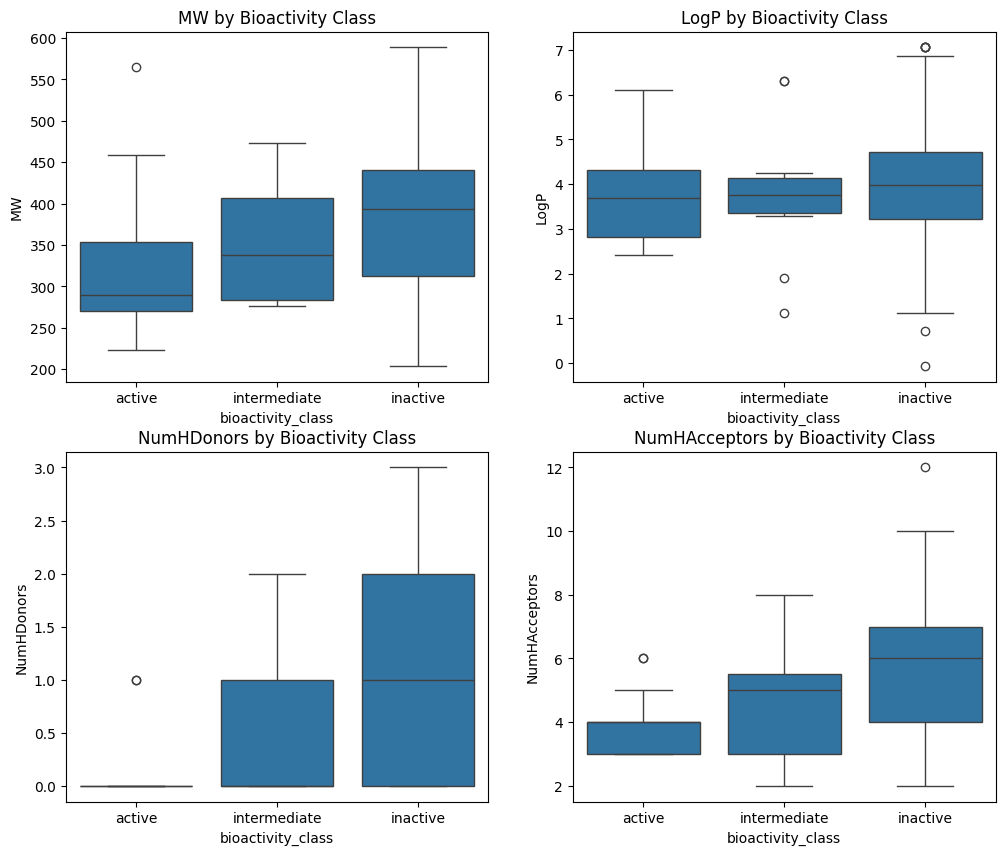

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each Lipinski descriptor
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plot boxplots or violin plots for each descriptor by bioactivity class
for i, col in enumerate(['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']):
    sns.boxplot(x='bioactivity_class', y=col, data=df_combined, ax=axes[i])
    axes[i].set_title(f'{col} by Bioactivity Class')
plt.show()




In [ ]:
# Filter to keep only 'active' compounds
df_combined_sorted.to_csv('bioactivity_data_sorted.csv', index=False)
df_combined_sorted



,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,Lipinski_violations
106,CHEMBL426898,O=C(Oc1cncc(Cl)c1)c1cc2ccccc2o1,170.0,active,273.675,3.70040,0,4,0
105,CHEMBL222234,O=C(Oc1cncc(Br)c1)c1ccco1,50.0,active,268.066,2.65630,0,4,0
15,CHEMBL358279,NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccc2ccccc2c1,370.0,active,330.343,2.66820,1,3,0
104,CHEMBL225515,O=C(Oc1cncc(Cl)c1)c1cc2ccccc2[nH]1,65.0,active,272.691,3.43550,1,3,0
123,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,700.0,active,276.291,4.09564,0,3,0
...,...,...,...,...,...,...,...,...,...
43,CHEMBL378674,CSc1sc(-c2nc(C)cs2)c(C)c1-c1ccnc(SCC(=O)Nc2ccc...,12000.0,inactive,519.142,7.05154,1,8,2
42,CHEMBL378674,CSc1sc(-c2nc(C)cs2)c(C)c1-c1ccnc(SCC(=O)Nc2ccc...,12022.64,inactive,519.142,7.05154,1,8,2
41,CHEMBL210097,O=C(CSc1nccc(-c2cc(-c3ccc(Cl)cc3Cl)no2)n1)Nc1c...,15000.0,inactive,525.339,6.85500,1,6,2
54,CHEMBL210145,CCOc1ccc(N2C(=O)CC(Sc3nc(C)cc(C)n3)C2=O)cc1,301995.17,inactive,357.435,2.91634,0,6,0
